In [19]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans

In [20]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is AA8E-7C58

 Directory of C:\Users\91720\OneDrive\Documents\ExcelR data science

15-06-2022  21:27    <DIR>          .
14-06-2022  21:14    <DIR>          ..
15-06-2022  21:11    <DIR>          .ipynb_checkpoints
26-05-2022  22:13             2,436 50_Startups.csv
23-03-2022  18:19            30,582 Afinn.csv
26-05-2022  22:03            92,594 AI [Regression ].ipynb
10-03-2022  15:29            37,286 Anova and Chisquare.ipynb
23-03-2022  18:19            23,666 apple.txt
30-04-2022  16:58            49,476 Assignment (1).docx
03-05-2022  21:47            51,050 Assignment 1.docx
26-05-2022  22:12            22,462 Assignment 4 Q2.ipynb
01-06-2022  22:30           528,239 Assignment 5 Q1 startup.ipynb
06-06-2022  22:18         1,583,525 Assignment 5 Q2 ToyotaCorolla.ipynb
10-06-2022  22:57            25,882 Assignment 6.ipynb
14-06-2022  22:48           187,916 Assignment 7 Q1.ipynb
26-05-2022  22:03            37,653 Assignmen

In [21]:
Air = pd.read_csv("Book2.csv")

In [22]:
Air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [24]:
Air1=Air.drop(['ID#'],axis=1)


In [25]:
Air1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [26]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [59]:
df_norm = norm_func(Air1.iloc[:,:])

In [60]:
df_norm.iloc[:,:]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,labels
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0.0,0.25
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0.0,0.25
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0.0,0.25
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0.0,0.25
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,0.5,0.00
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,0.5,0.00
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,0.5,0.00
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,0.0,0.25


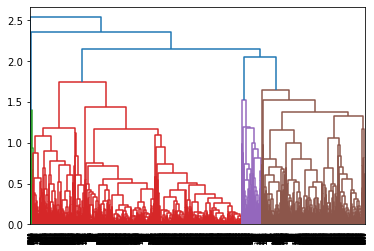

In [61]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [63]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [64]:
hc.fit_predict(df_norm)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [65]:
y_hc = hc.fit_predict(df_norm)

In [66]:
df_norm['h_clusterid'] = y_hc 

In [67]:
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,labels
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0,0.25
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0,0.25
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0,0.25
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0,0.25
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,1,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,1,0.00
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,1,0.00
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,1,0.00
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,0,0.25


In [68]:
Air1['h_clusterid'] = y_hc 

In [69]:
Air1.groupby(["h_clusterid"])["Balance"].apply(lambda x:tuple(x))

h_clusterid
0    (28143, 19244, 41354, 14776, 16420, 84914, 400...
1    (97752, 20856, 443003, 104860, 28495, 51890, 1...
2    (8669, 167670, 55610, 44824, 84856, 16103, 491...
3                       (53232, 287033, 160114, 27619)
4    (96522, 120576, 38896, 35418, 185549, 25076, 3...
Name: Balance, dtype: object

In [70]:
from sklearn.cluster import KMeans

In [71]:
model_kmeans = KMeans(n_clusters=5) 
model_kmeans.fit(df_norm)

KMeans(n_clusters=5)

In [72]:
model_kmeans.labels_

array([1, 1, 1, ..., 4, 1, 1])

In [73]:
md=pd.Series(model_kmeans.labels_)

In [74]:
Air1["labels"]=pd.Series(model_kmeans.labels_)

In [75]:
Air1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,labels
0,28143,0,1,1,1,174,1,0,0,7000,0,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1,4
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,1


In [76]:
Air1.groupby(["labels"])["Balance"].apply(lambda x:tuple(x))

labels
0    (20856, 13958, 185681, 19221, 23193, 2176, 603...
1    (28143, 19244, 41354, 14776, 16420, 40091, 433...
2    (96522, 120576, 38896, 35418, 185549, 25076, 3...
3    (84914, 177926, 276571, 121260, 75971, 38077, ...
4    (97752, 443003, 104860, 28495, 51890, 91473, 2...
Name: Balance, dtype: object

In [84]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [86]:
Air2=pd.read_csv('Book2.csv')

In [87]:
Air2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [91]:
df=Air2.iloc[:,1:]

In [92]:
df.values

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [93]:
stscaler=StandardScaler().fit(df.values)
x=stscaler.transform(df.values)

In [94]:
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [95]:
dbscan=DBSCAN(eps=2,min_samples=5)
dbscan.fit(x)

DBSCAN(eps=2)

In [96]:
dbscan.labels_


array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [97]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [98]:
cl

,cluster
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [99]:
pd.concat([Air2,cl],axis=1)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [101]:
import seaborn as sns

In [104]:
Air3=pd.read_csv('Book2.csv')

In [105]:
Air3

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [109]:
Air3.sample(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
1853,1870,181200,0,1,1,1,7514,21,0,0,4159,0
3503,3526,14494,0,1,1,1,500,1,0,0,575,0
1940,1957,56213,0,1,1,1,3207,14,350,1,3900,0
1679,1695,5617,0,1,1,1,4400,4,400,1,4706,1
1211,1224,131992,0,3,1,1,12504,16,0,0,5372,0
3680,3703,570,0,1,1,1,180,4,0,0,785,0
1863,1880,15875,0,3,1,1,24918,12,0,0,4141,1
2888,2910,78317,0,3,1,1,34282,35,2537,11,1859,1
3333,3356,54697,0,1,1,1,1625,6,0,0,1809,0
2807,2829,17681,0,1,1,1,500,1,0,0,2059,0


In [110]:
nc=[2,3,4,5,6,7,8,9]
iner=[]    
for i in nc:
    km=KMeans(i)
    km.fit(Air3.iloc[:,:4])
    iner.append(km.inertia_)

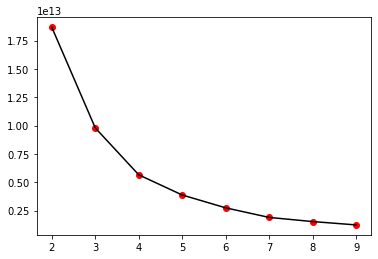

In [111]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

In [ ]:
# The optimal no of cluster=3

In [112]:
from sklearn.metrics import silhouette_score as sil

In [114]:
nc=[2,3,4,5,6,7,8,9]
sc_score=[]    
for i in nc:
    km=KMeans(i)
    y=km.fit_predict(Air3.iloc[:,:4])
    sc_score.append(sil(Air3.iloc[:,:4],y))

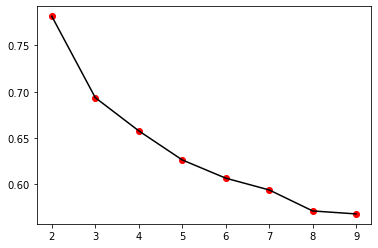

In [115]:
plt.plot(nc,sc_score,color="black")
plt.scatter(nc,sc_score,color="red")
plt.show()

In [ ]:
# The optimal no of cluster=3